# Contact Tracing

The dataset consists of the following columns:
- id: Unique ID for each observation
- timestamp: Datetime of contact observation
- latitude: Latitude of the contact location
- longitude: Longitude of the contact location

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_json('./dataset/contact-tracing.json')
df.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273


In [3]:
def check_df(dataframe, head=5):
    print("-----Shape-----")
    print(dataframe.shape)
    print("----- Types -----")
    print(dataframe.dtypes)
    print("----- Head -----")
    print(dataframe.head(head))
    print("----- Null -----")
    print(dataframe.isnull().sum())

check_df(df)

-----Shape-----
(580, 4)
----- Types -----
id                   object
timestamp    datetime64[ns]
latitude            float64
longitude           float64
dtype: object
----- Head -----
      id           timestamp   latitude  longitude
0  David 2020-07-04 15:35:30  13.148953  77.593651
1  David 2020-07-04 16:35:30  13.222397  77.652828
2  Frank 2020-07-04 14:35:30  13.236507  77.693792
3  Carol 2020-07-04 21:35:30  13.163716  77.562842
4   Ivan 2020-07-04 22:35:30  13.232095  77.580273
----- Null -----
id           0
timestamp    0
latitude     0
longitude    0
dtype: int64


In [4]:
df.describe()

,latitude,longitude
count,580.000000,580.000000
mean,13.151090,77.607165
std,0.083254,0.057266
min,13.000369,77.500290
25%,13.083389,77.560890
50%,13.149155,77.606620
75%,13.218690,77.657013
max,13.299367,77.705454


In [5]:
# Converting column to datetime
df['timestamp']=pd.to_datetime(df['timestamp'],format='%Y-%m-%d %H:%M:%S')
# Creating hour column
df['hour']=df['timestamp'].apply(lambda x: x.hour+1)
df.head()

,id,timestamp,latitude,longitude,hour
0,David,2020-07-04 15:35:30,13.148953,77.593651,16
1,David,2020-07-04 16:35:30,13.222397,77.652828,17
2,Frank,2020-07-04 14:35:30,13.236507,77.693792,15
3,Carol,2020-07-04 21:35:30,13.163716,77.562842,22
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273,23


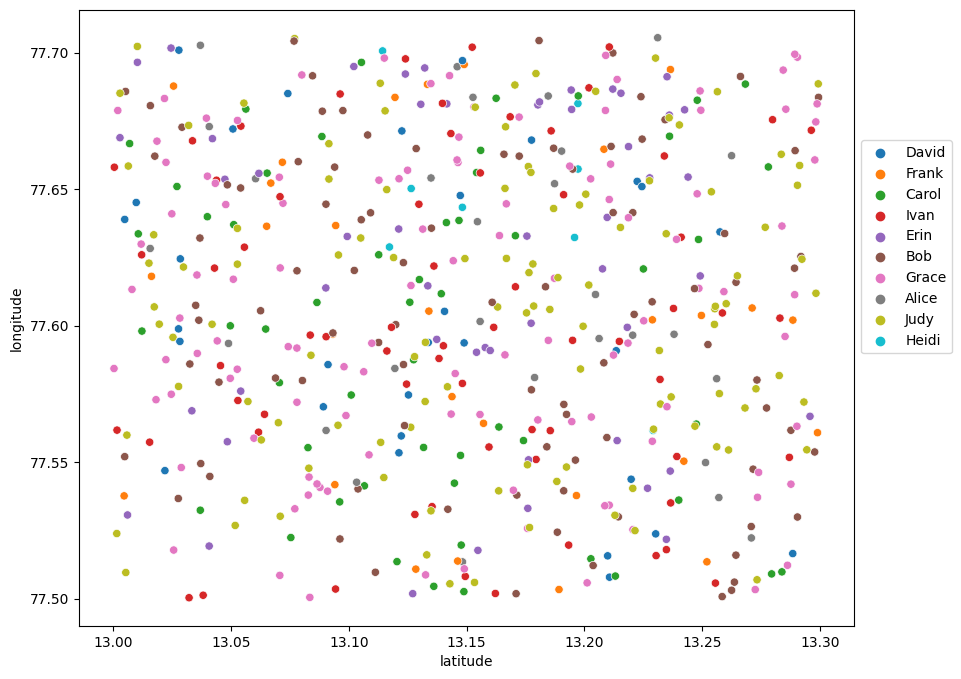

In [6]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(bbox_to_anchor= [1, 0.8])
plt.show()

## Creating a Model

In [7]:
epsilon = 0.0018288 # a radial distance of 6 feet in kilometers
model = DBSCAN(eps = epsilon, min_samples = 2, metric = 'haversine').fit(df[['latitude', 'longitude']])
df['cluster'] = model.labels_.tolist()

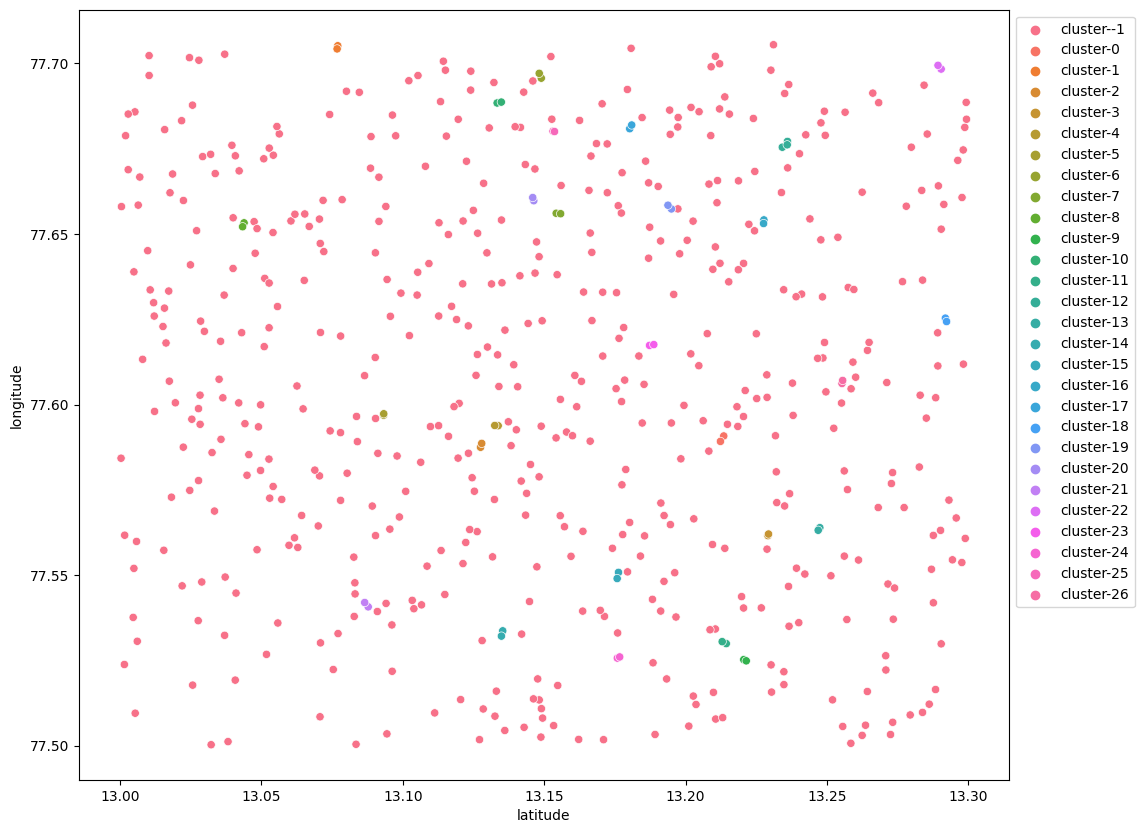

In [8]:
labels = model.labels_
fig = plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x='latitude', y='longitude', hue = ['cluster-{}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1, 1])

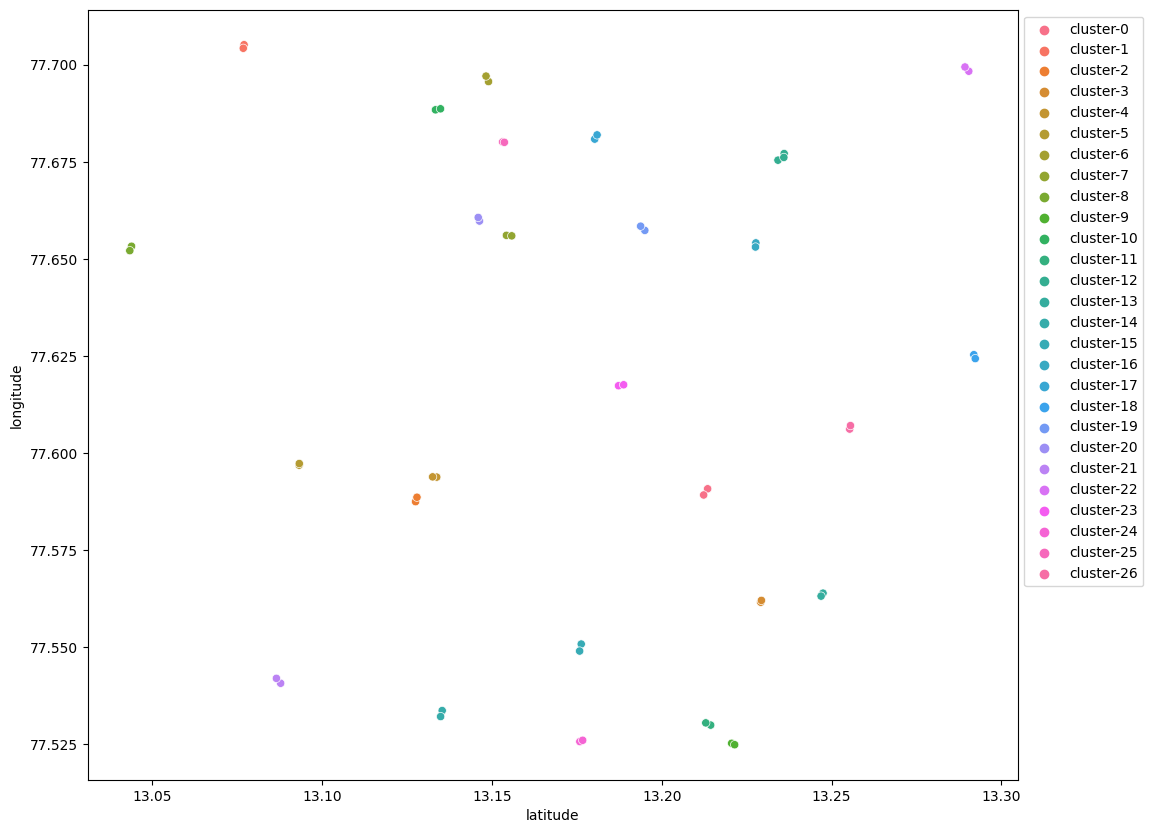

In [9]:
ids = df[(df['cluster'] == -1)].index
df.drop(ids, inplace = True)
labels = model.labels_
fig = plt.figure(figsize=(12,10))
sns.scatterplot(data = df, x = 'latitude', y = 'longitude', hue = ['cluster-{}'.format(x) for x in df['cluster']])
plt.legend(bbox_to_anchor = [1, 1])

In [10]:
def get_infected_names(input_name):
    epsilon = 0.0018288  # a radial distance of 6 feet in kilometers
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()

    input_name_clusters = []
    for index, row in df.iterrows():
        if row['id'] == input_name:
            if row['cluster'] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(row['cluster'])

    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for member_id in ids_in_cluster:
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass
    return infected_names

In [11]:
get_infected_names("David")

['Grace', 'Judy', 'Frank']

In [12]:
get_infected_names("Erin")

['Judy', 'Bob']